In [58]:
# !pip install seaborn
# !pip install yellowbrick

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [5]:
customer_data = pd.read_csv('Mall_Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Gender', ylabel='Count'>

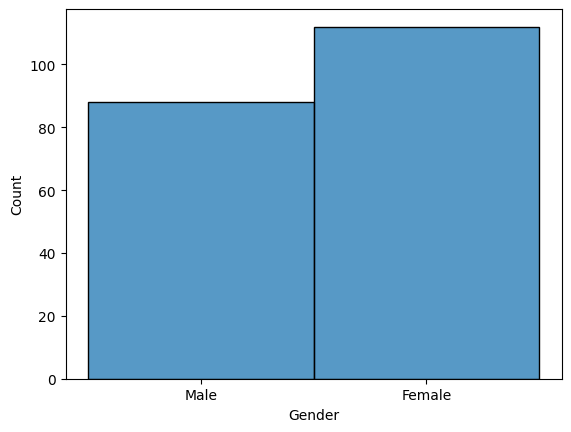

In [14]:
sns.histplot(data=customer_data, x='Gender')

The number of females is higher than the number of males among our customer base. Percentage-wise, this amounts to as follows:

<Axes: >

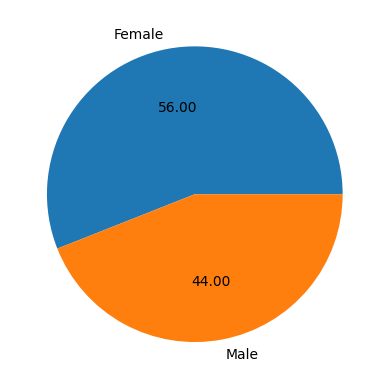

In [26]:
customer_data.groupby('Gender').size().plot(kind='pie', autopct='%.2f')

We should focus our marketing more towards female customers. But what about our age distribution? 

<Axes: xlabel='Age', ylabel='Count'>

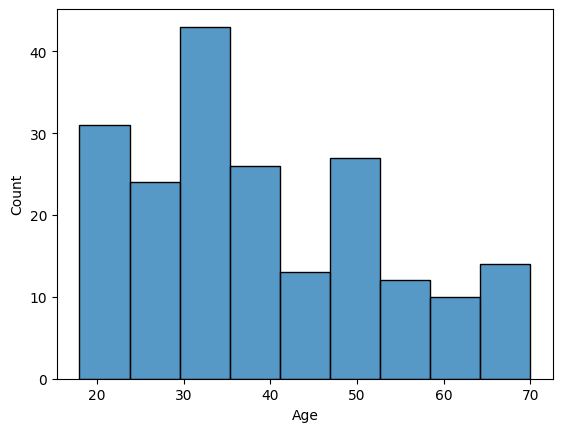

In [27]:
sns.histplot(data=customer_data, x='Age')

Lots of millenials it appears! Let's see how outliers look.

<Axes: xlabel='Age'>

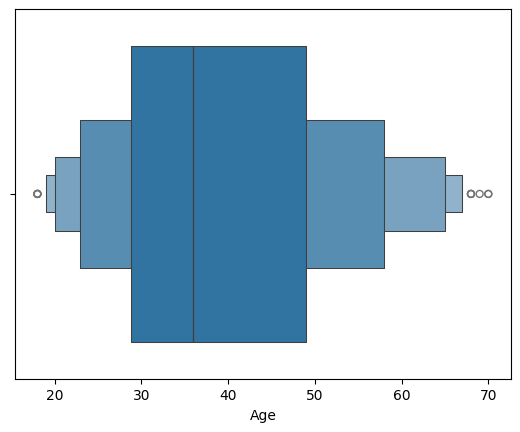

In [28]:
sns.boxenplot(data=customer_data, x='Age')

There are slightly more outliers in the 70+ range (e.g. retirees). But most customers are between 30 and 35. How does income break down?

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

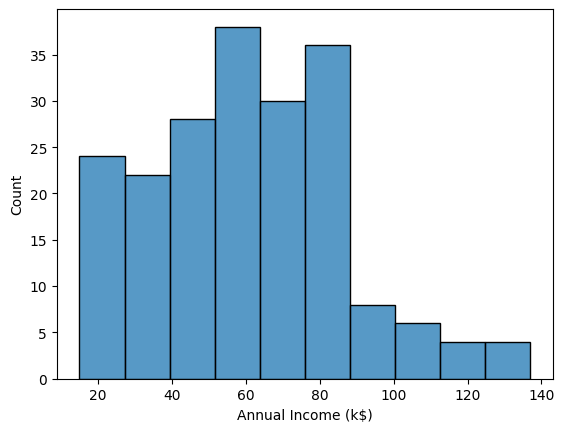

In [30]:
sns.histplot(data=customer_data, x='Annual Income (k$)')

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

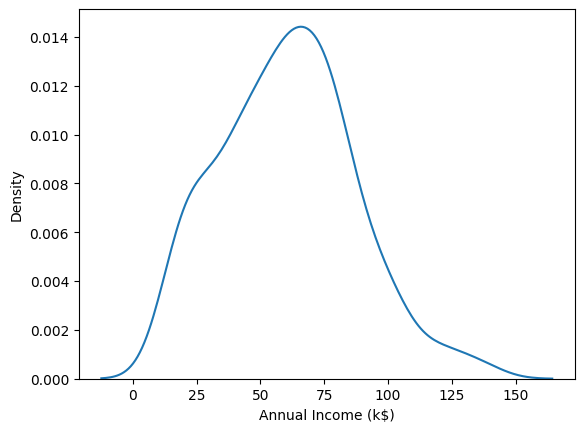

In [34]:
sns.kdeplot(data=customer_data, x='Annual Income (k$)')

Income looks to be relatively normal on an annual basis. However, for females as seen below, the distribution is skewed towards the lower end.

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

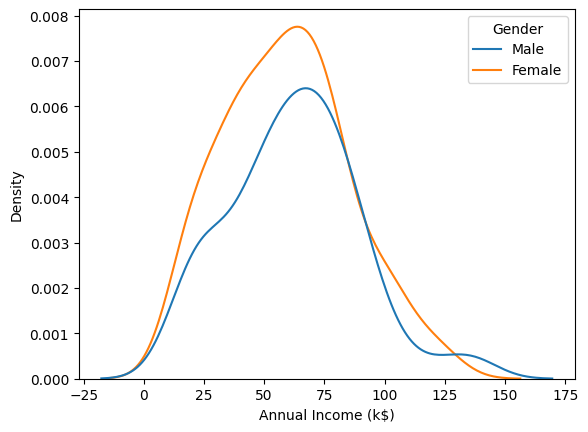

In [35]:
sns.kdeplot(data=customer_data, x='Annual Income (k$)', hue = 'Gender')

Finally, let's evaluate spending score. 

<Axes: xlabel='Spending Score (1-100)'>

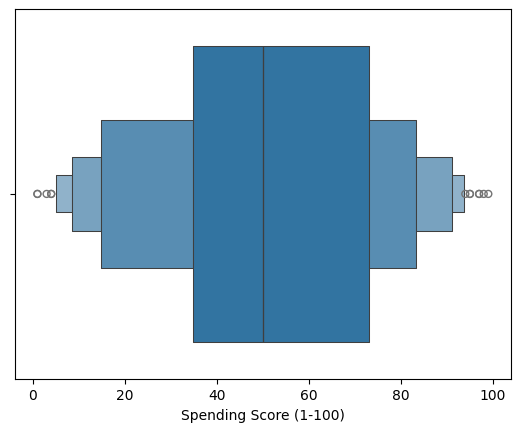

In [38]:
sns.boxenplot(data=customer_data, x='Spending Score (1-100)')

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

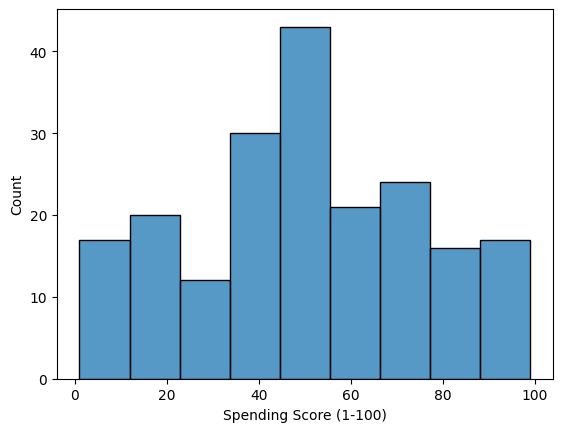

In [39]:
sns.histplot(data=customer_data, x='Spending Score (1-100)')

Spending scores appear to be mostly between 35 and 70. Most are within the 50s.

Now we will attempt to fit a model using K-means clustering. 

Summing up the K-means clustering –

We specify the number of clusters that we need to create.
The algorithm selects k objects at random from the dataset. This object is the initial cluster or mean.
The closest centroid obtains the assignment of a new observation. We base this assignment on the Euclidean Distance between object and the centroid.
k clusters in the data points update the centroid through calculation of the new mean values present in all the data points of the cluster. The kth cluster’s centroid has a length of p that contains means of all variables for observations in the k-th cluster. We denote the number of variables with p.
Iterative minimization of the total within the sum of squares. Then through the iterative minimization of the total sum of the square, the assignment stop wavering when we achieve maximum iteration. The default value is 10 that the uses for the maximum iterations.

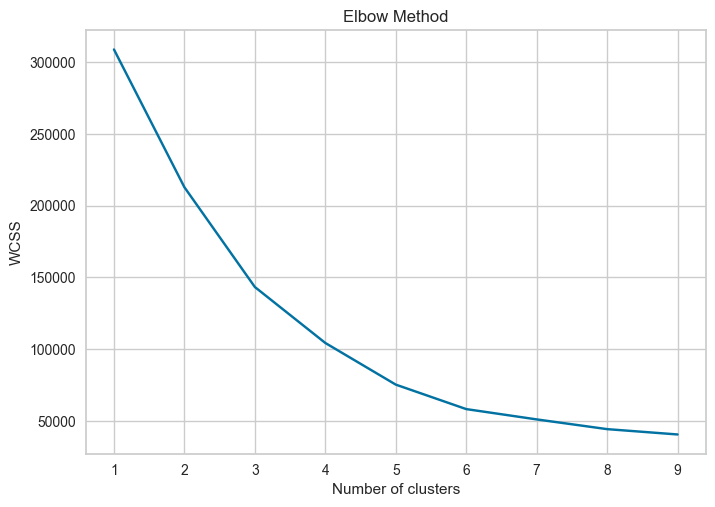

In [63]:
data = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
wcss = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init = 'k-means++', max_iter=1000, n_init=10, random_state=0).fit(data)
    wcss[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(wcss.keys()), list(wcss.values()))
plt.title('Elbow Method')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

From the above graph, we conclude that 4 is the appropriate number of clusters since it seems to be appearing at the bend in the elbow plot.

With the help of the average silhouette method, we can measure the quality of our clustering operation. With this, we can determine how well within the cluster is the data object. If we obtain a high average silhouette width, it means that we have good clustering. The average silhouette method calculates the mean of silhouette observations for different k values. With the optimal number of k clusters, one can maximize the average silhouette over significant values for k clusters.

Using the silhouette function in the cluster package, we can compute the average silhouette width using the kmean function. Here, the optimal cluster will possess highest average.

In [67]:
km = KMeans(n_clusters=4, max_iter=1000, n_init=10)
km.fit_predict(data)
score = silhouette_score(data, km.labels_, metric='euclidean')
print(f"{score:.0%}")

41%


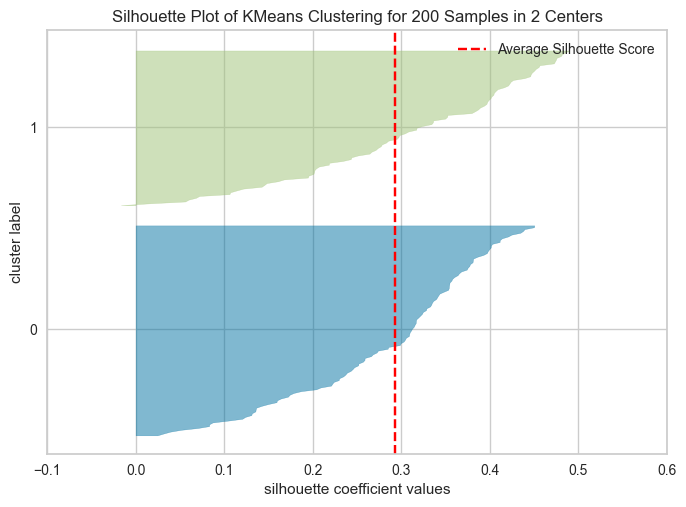

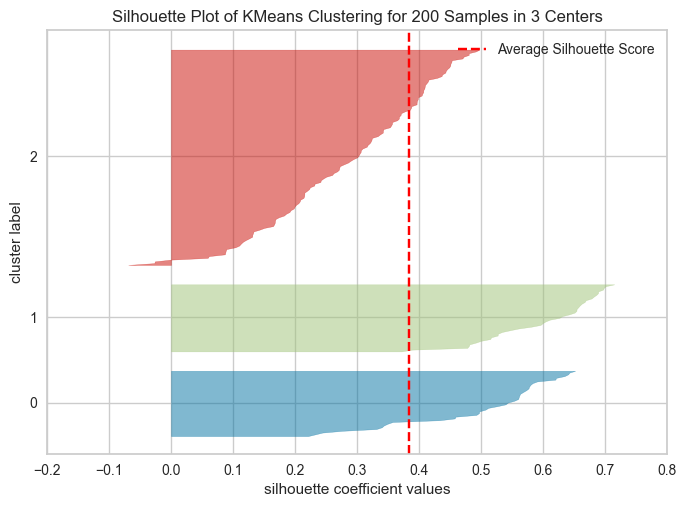

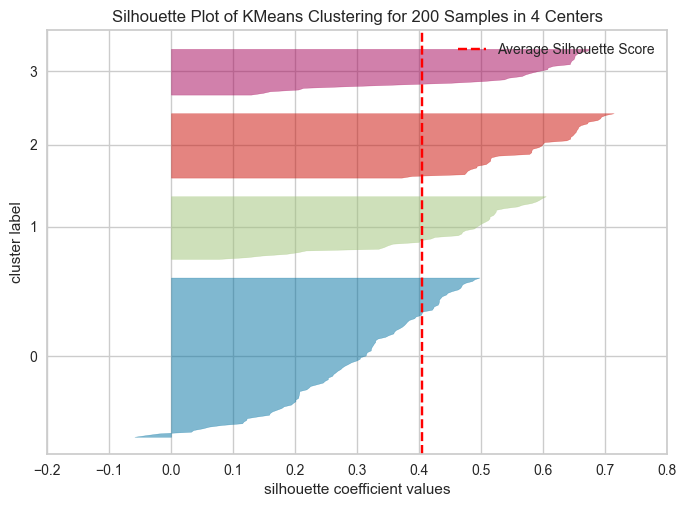

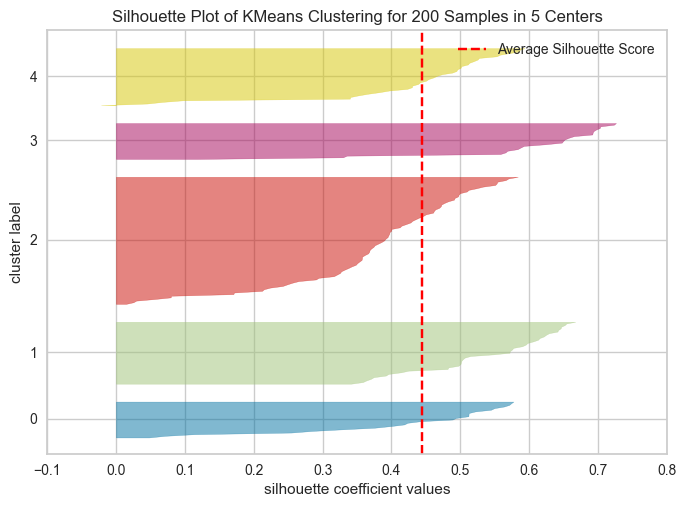

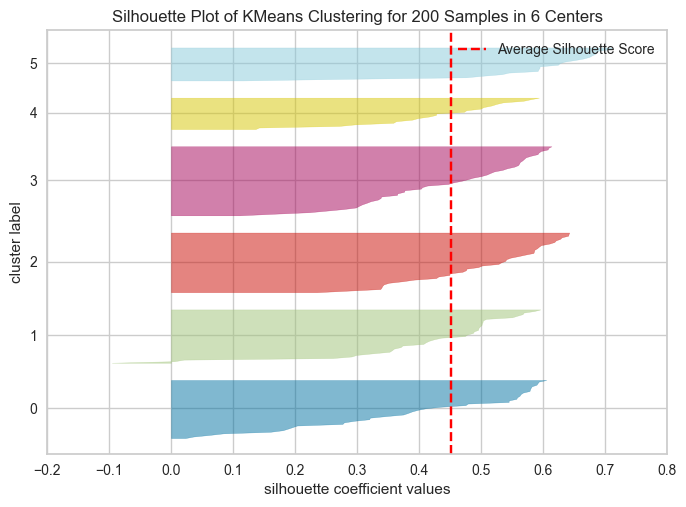

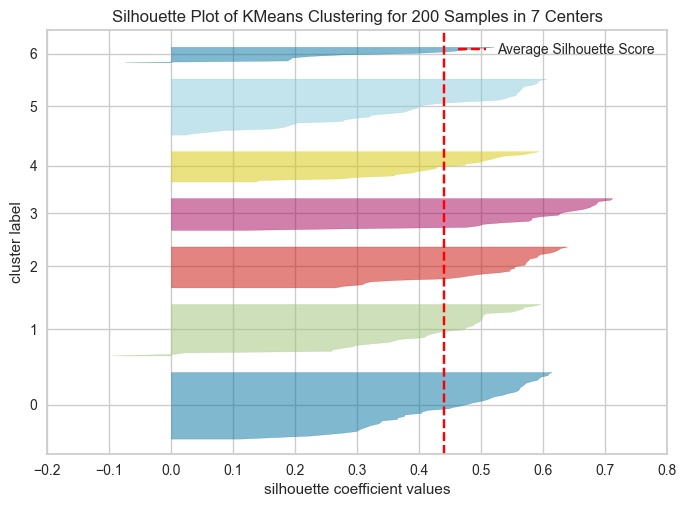

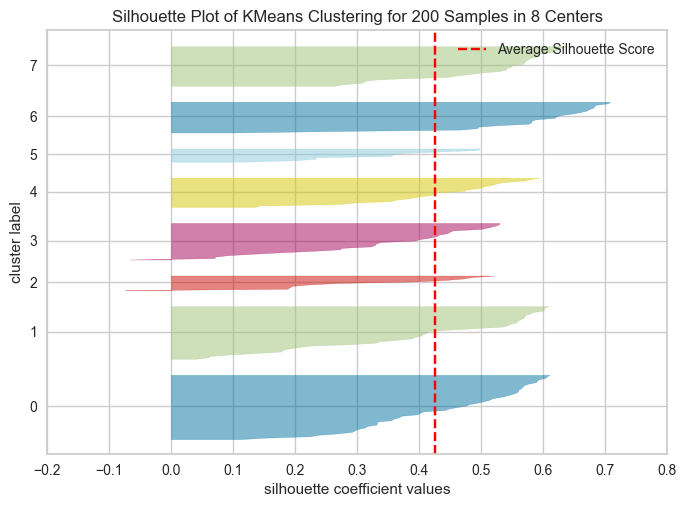

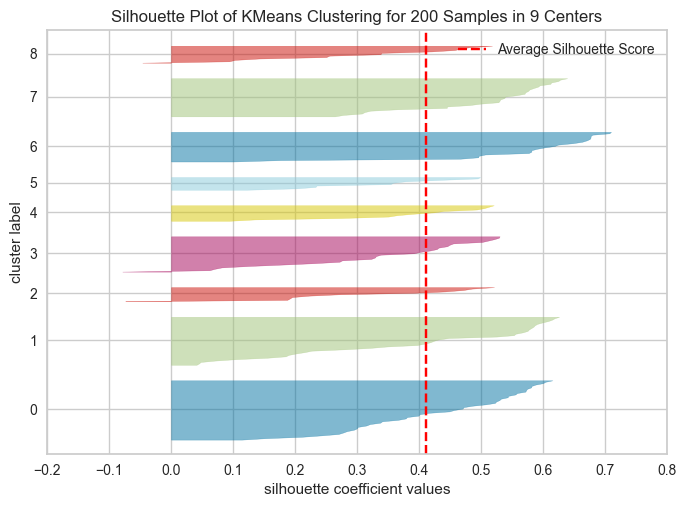

In [122]:
for i in range(2, 10):
    # craete Kmeans instance for different # of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(data)
    visualizer.show()

From the Silhouette Analysis, the value of n_clusters as 5 or 6 given that these silhouette scores are higher or equal to the overall silhouette score. We want to keep an eye out for uniform thickness of each cluster plot too, and from this analysis, it appears that n = 6 is slightly more uniform. Thus, optimal clusters is n = 6.

In [123]:
km = KMeans(n_clusters=6, max_iter=1000, n_init=10)
clusters = km.fit_predict(data)
score = silhouette_score(data, km.labels_, metric='euclidean')
print(f"{score:.0%}")

45%


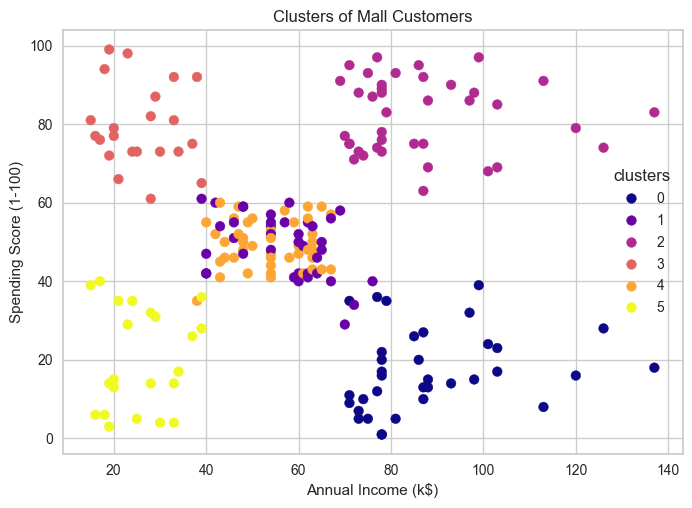

In [124]:
sc = plt.scatter(data=data, x = 'Annual Income (k$)', y = "Spending Score (1-100)", c=clusters, cmap="plasma")
plt.legend(*sc.legend_elements(), title='clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Mall Customers')
plt.show()

Cluster 00 (1) – This cluster denotes the customer_data with a high annual income as well as high yearly spend of income.

Cluster 01 (2) – This cluster denotes a low annual income and low yearly spend.

Cluster 02 (3) – This cluster denotes a high annual income and low yearly spend.

Cluster 03 (4) – These clusters represent the customer_data with the medium-level income and medium-level spend, and represents the largest group.

Cluster 04 (5) – This cluster represents a low annual income but high spending score